In [ ]:
# here I am attempting to solve the first scenario of the requirements
# most of the stuff to solve this is done in the labs
# Scenario 1 (real world) - you receive a test set containing 55 scanned images annotated with the option (F or I) and with the digit (1, 2, 3 or 4). For each image you have
# to output the corresponding grade. Each correctly labeled scanned image will worth
# 0.03 points for a total of 1.65 points;

In [ ]:
# Basically, I will do the following steps:
# 1. Apply filters on images and detect the edges (canny edge?)
#    1.a grayscale the image
#    1.b apply filter (gaussian, sobel?)
#    1.c canny edge detection?
# 2. Detect lines
#    2.a Detect horizontal lines
#    2.b Detect vertical lines
#    2.c Merge image
#3. Detect boxes and create an inside, smaller box, as to not count the edges
#    3.a Detect boxes (lab 3.1)
#    3.b Verify mean color inside the boxes and mark as green with X and red without X
#    3.c Store the data and compare it to the answers in the files
#    3.d Do this on all files and see accuracy

In [1]:
# imports
# Required libraries to be installed: Pillow, OpenCV
import cv2 as cv
import numpy as np
import glob
import os
import pickle
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
from IPython.display import clear_output, Image, display
import PIL.Image
import io

In [7]:
base_folder = './Files/images/' # change this on your machine
images = glob.glob(os.path.join(base_folder, "image_*.jpg")) 
char_to_index = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
image_index = 0

In [149]:
# global variables

# kernel size. h and v stand for orientation
hk_size = 11
vk_size = 11

In [153]:
# show image function is taken from Andrei Manolache outside of the project scope, I trust it does not count as plagiarism 
def show_image(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))
    
def read_image(index):
    image = cv.imread(images[index])
    return cv.resize(image, (0, 0), fx=0.15, fy=0.15)

def split_first_table(image):
    image_h, image_w, channels = image.shape
    return image[int(0.5 * image_h):int(image_h * 0.9), int(image_w * 0.1): int(image_w * 0.4)]

def split_second_table(image):
    image_h, image_w, channels = image.shape
    return image[int(0.5 * image_h):int(image_h * 0.9), int(image_w * 0.60): int(image_w * 0.9)]

def apply_filters(image):
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image_gray

def horizontal_kernel():
    kernel = np.array([hk_size * [0], hk_size * [1], hk_size * [0]])
    kernel = kernel / kernel.sum()
    return kernel

def vertical_kernel():
    kernel = np.array(vk_size * [int(vk_size / 2) * [0] + [1] + int(vk_size / 2) * [0]])
#     kernel = np.array([[0,1,0],[0,1,0],[0,1,0]])                
    kernel = kernel / kernel.sum()
    return kernel

def filter_vertical(image):    
    mean_value = image.mean()
    _, image_th = cv.threshold(image, mean_value, 255, cv.THRESH_BINARY_INV)
    thresholded = image_th
    filtered = 255 - cv.filter2D(255 - thresholded, -1, vertical_kernel())
    filtered[filtered < 255] = 0
    filtered_vertical = filtered
    return filtered_vertical


def filter_horizontal(image):    
    mean_value = image.mean()
    _, image_th = cv.threshold(image, mean_value, 255, cv.THRESH_BINARY_INV)
    thresholded = image_th
    filtered = 255 - cv.filter2D(255 - thresholded, -1, horizontal_kernel())
    filtered[filtered < 255] = 0
    filtered_vertical = filtered
    return filtered_vertical

def get_horizontal_lines(filtered_horizontal, num_lines):
    mask = filtered_horizontal // 255
    res = np.sum(mask, axis=1) 
    res = res.argsort() 
    h_img = np.dstack((filtered_horizontal, filtered_horizontal, filtered_horizontal))
    lines = [] #  _ x 
    for i in range(num_lines+1):
        cv.line(h_img, (0, res[-i]), (h_img.shape[1], res[-i]), (0, 0, 255), 2) 
        lines.append([(0, res[-i]), (h_img.shape[1], res[-i])])
    return h_img

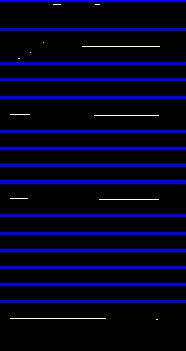

In [161]:
# testing flow
# read image
img = read_image(1)

# cut image
img = split_first_table(img)

#apply filters
img_gray = apply_filters(img)

# obtain binary image
filtered_h = filter_horizontal(img_gray)

horizontal_l = get_horizontal_lines(filtered_h, 15)
show_image(horizontal_l)

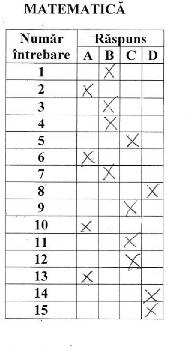

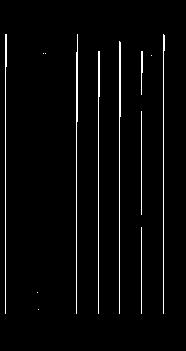

In [156]:
# testing written functions
img = read_image(1)
img1 = split_first_table(img)
img2 = split_second_table(img)
# show_image(img1)
# show_image(img2)
img1_gray = apply_filters(img1)
show_image(img1_gray)
img1_filtered_vertical = filter_vertical(img1_gray)
show_image(img1_filtered_vertical)

In [13]:
len(images)

150